# ТВиМС. Лабораторная работа №2

## Вариант 25
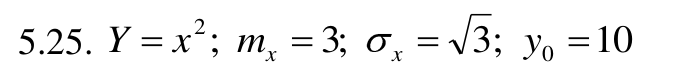

In [115]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

import copy

In [116]:
# globals
sigma = 1.73205
Mx = 3.0

PRESISION = 5

a = Mx - round(1.73205 * sigma, PRESISION)
b = Mx + round(1.73205 * sigma, PRESISION)

N = 1000
INTERVALS = int(np.sqrt(N)) if N <= 100 else int(3 * np.log(N))

In [117]:
# getting eps
def eps():
    return np.random.random_sample()

# getting x with eps
def x_func():
    return eps() * (b - a) + a

# getting y with x
def y_func(x):
    return x * x

# Теоретическая плотность распределения

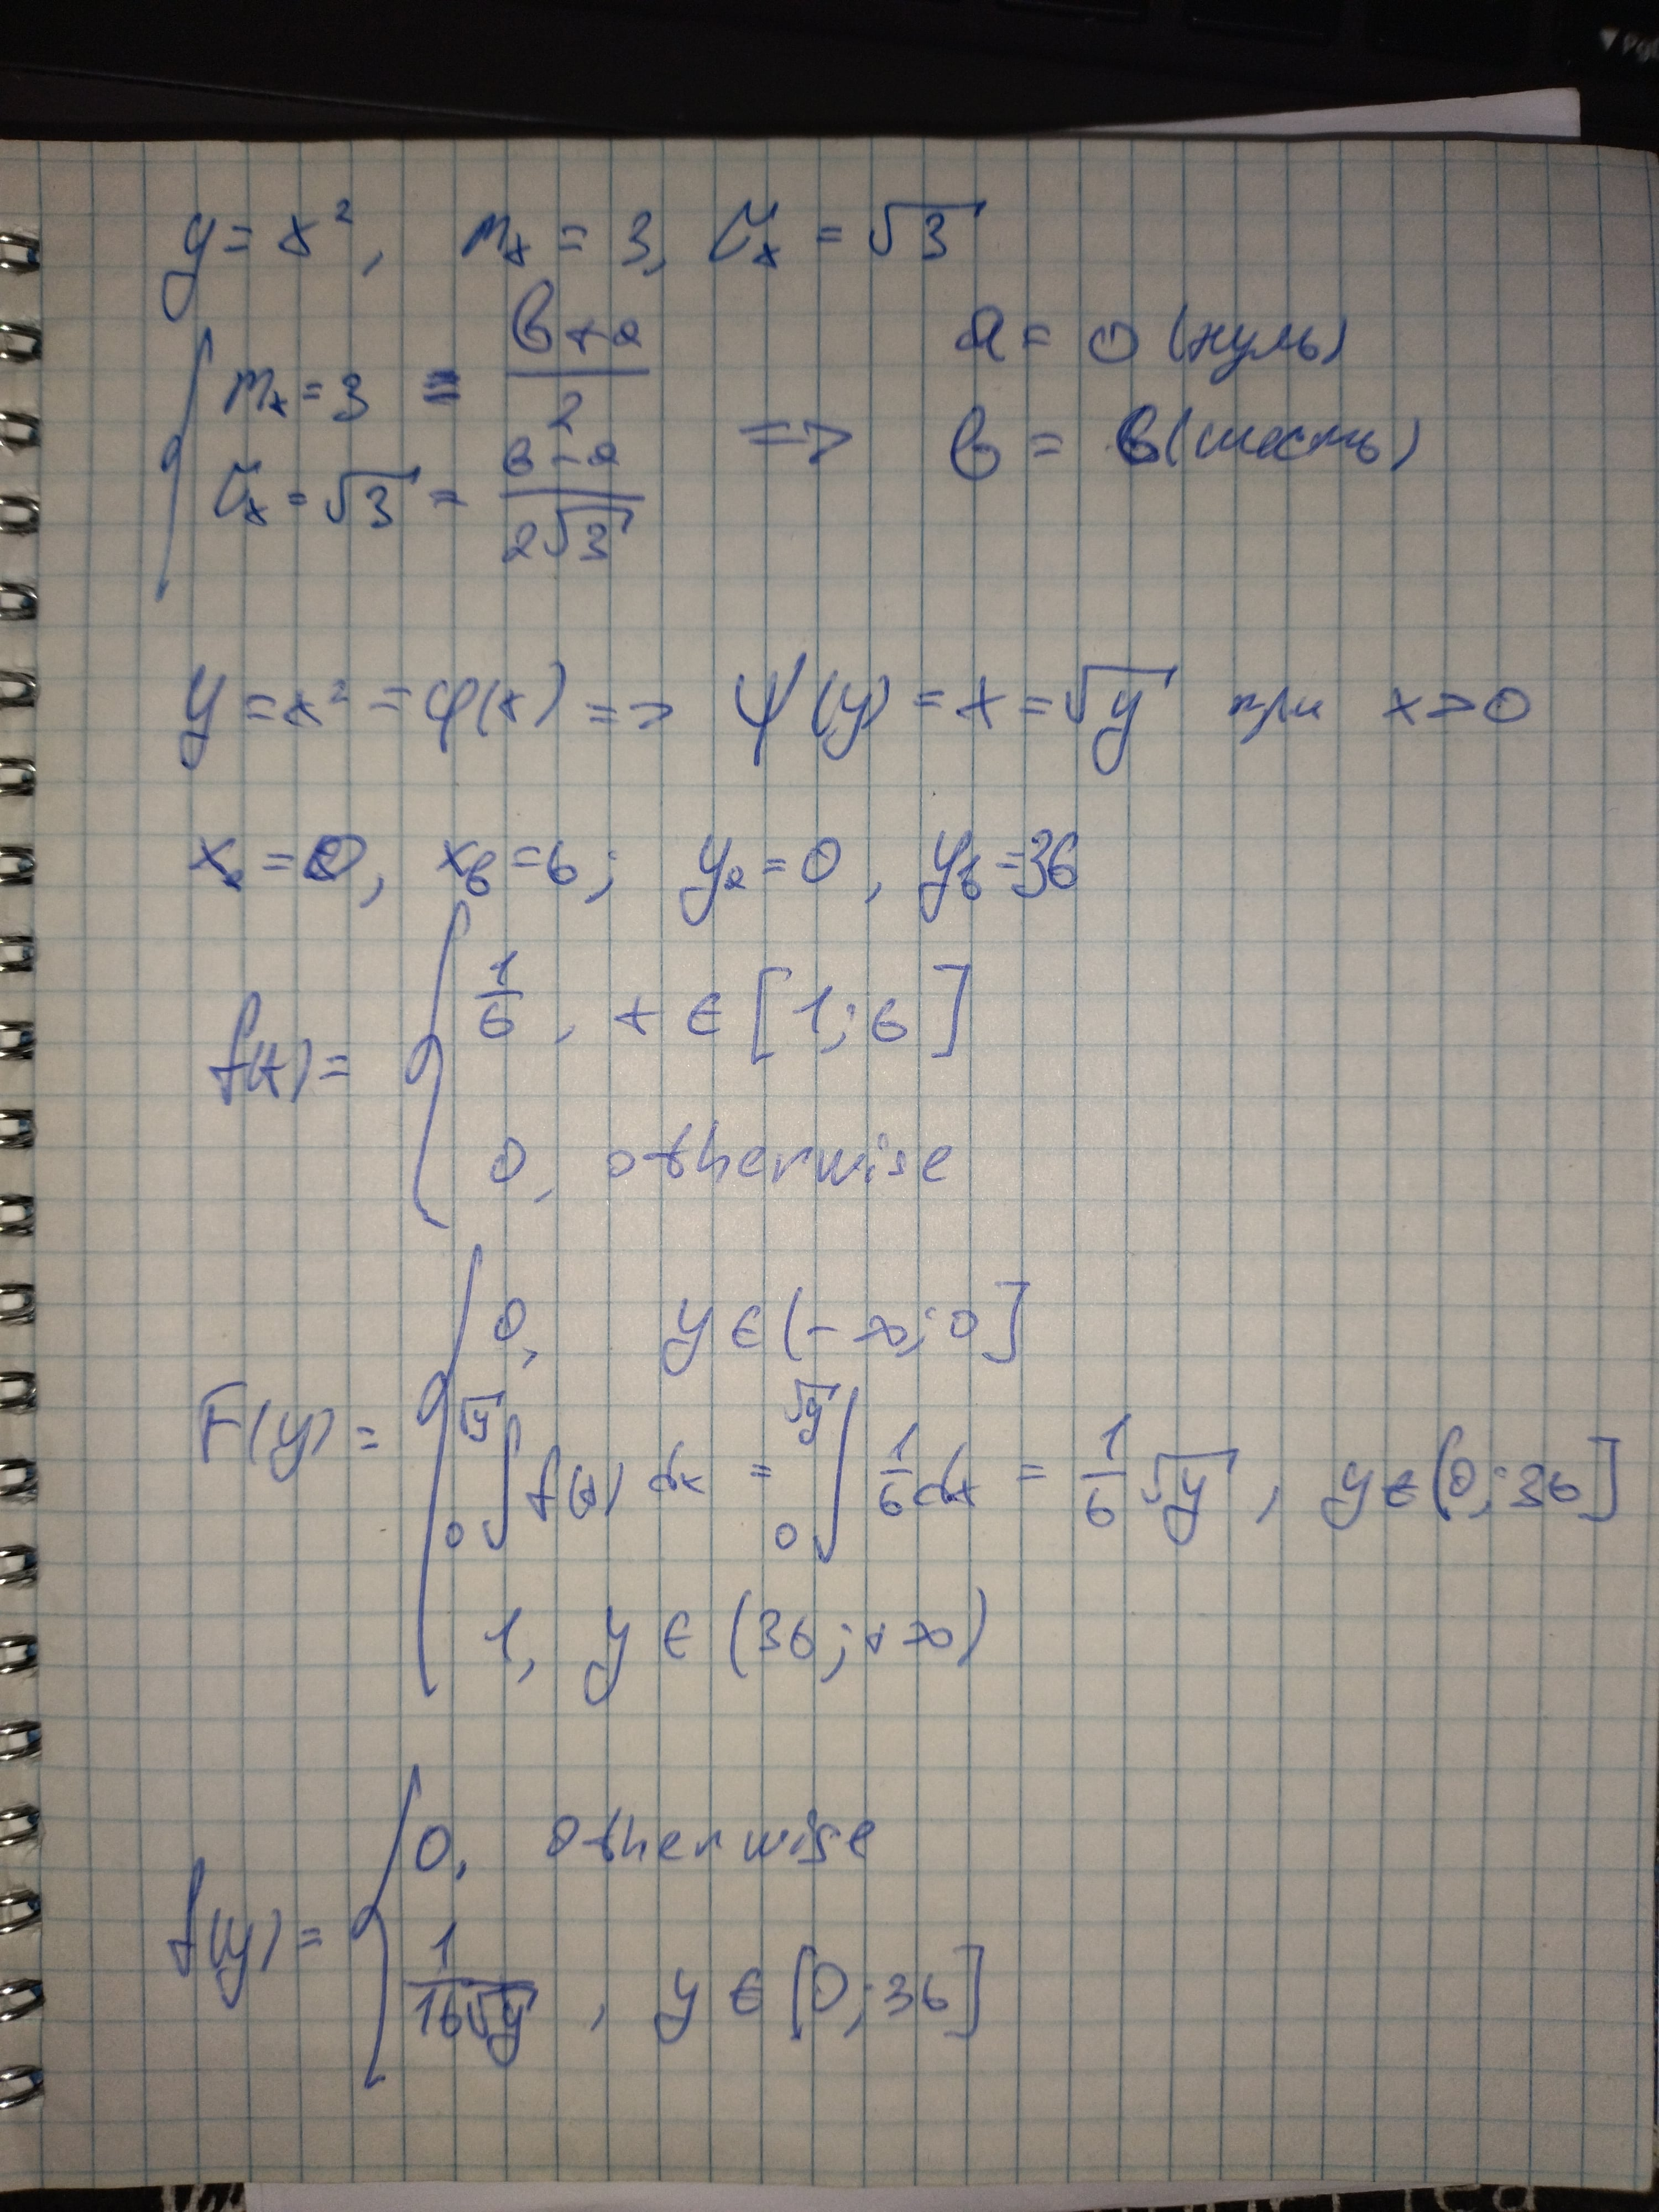

In [118]:


# theoretical distribution density
def theory_density(y):
    if y > 0 and y <= 36:
        return 1.0 / (16 * np.sqrt(y))
    return 0

def get_theory():
    ys = np.linspace(y_func(a), y_func(b), 1000)
    ps = [theory_density(y) for y in ys]
    return ys, ps

## Функции для построения вариационного ряда и подсчета частот

In [119]:
# generating n variants of y
def get_varseries(n: int):
    ans = []
    for i in range(0, n):
        ans.append(y_func(x_func()))
    ans.sort()
    return ans

# representation
def print_varseries(invs, amounts):
    base_output = "{:<5} {:<30} {:<10}"
    print(base_output.format("N", "Interval", "Amount"))
    num = 0
    for i in range(len(invs)):
        num += 1
        print(base_output.format(
            num, 
            f"({round(invs[i - 1] if i != 0 else 0, PRESISION)}, {round(invs[i], PRESISION)}]", 
            round(amounts[i], PRESISION)
        ))

# make histogram
def make_plot(intrvs, amounts, lbl=""):
    plt.step(intrvs, amounts, label=lbl)
    plt.legend()
    plt.show()

# compaire theory and empirical data
def comp(invs, ams):
    ys, ps = get_theory()
    plt.plot(ys, ps, label="theory", color="red")
    plt.step(invs, ams, label="emirical data", color="blue")
    plt.legend()
    plt.show()
    

# Равноинтервальное деление на группы

In [120]:
# equidistant histogram
def get_equid_hist(variants: list):
    A = variants[0]
    B = variants[-1]
    h = (B - A) / INTERVALS
    xs = [A] + [A + h * (i + 1) for i in range(INTERVALS)]
    ys = [0]
    it = 0
    for i in range(INTERVALS):
        amount = 0
        while it < N and variants[it] <= xs[i + 1]:
            it += 1
            amount += 1
        try:
            amount /= (h * N)
        except ZeroDivisionError:
            amount = np.inf
        ys.append(amount)
    xs.append(B)
    ys.append(0)
    return xs, ys

# Равновероятностное деление на группы

In [121]:
# equal probabilities
def get_qprob_hist(variants: list):
    xs = [variants[0]]
    ys = [0]
    m = N / INTERVALS
#     if N % INTERVALS != 0:
#         m = int(m)
    it = 0
    prv_it = 0
    for i in range(INTERVALS):
        it = int(N * (i + 1) / INTERVALS - 0.5)
        xs.append(variants[it])
        try:
            ys.append(m / (N * (variants[it] - variants[prv_it])))
        except ZeroDivisionError:
            ys.append(np.inf)
        prv_it = it
    xs.append(variants[-1])
    ys.append(0)
    return xs, ys
        

In [122]:
# polygon of distribution
def make_polygon(i, am, lbl=""):
    dots = [0]
    for j in range(1, len(i)):
        h = (i[j] - i[j - 1]) / 2.0
        dots.append(i[j - 1] + h)
    plt.plot(dots, am, label=lbl)
    plt.scatter(dots, am)
    plt.legend()
    plt.show()
    
# empirical distribution function
def make_emperical_plot(i, am, lbl="", equid=True):
    ws = []
    for p in range(len(am)):
        if equid:
            s = 0
            for t in range(p - 1):
                s += am[t] * (i[t + 1] - i[t])
            ws.append(s)
#         as *= (i[p + 1] - i[p] if p + 1 < N else )
        else:
            ws.append(0)
            m = 1 / INTERVALS
            for t in range(len(am) - 1):
                ws.append(t * m)
            break
    plt.step(i, ws, label=lbl)
    plt.legend()
    plt.show() 

## Построение гистограммы равноинтервальным методом

In [123]:
varnts = get_varseries(N)
i, am = get_equid_hist(varnts)
print_varseries(i, am)

N     Interval                       Amount    
1     (0, 6e-05]                     0         
2     (6e-05, 1.7935]                0.12155   
3     (1.7935, 3.58694]              0.04851   
4     (3.58694, 5.38037]             0.04238   
5     (5.38037, 7.17381]             0.0329    
6     (7.17381, 8.96725]             0.02955   
7     (8.96725, 10.76069]            0.03011   
8     (10.76069, 12.55413]           0.0223    
9     (12.55413, 14.34756]           0.02342   
10    (14.34756, 16.141]             0.02119   
11    (16.141, 17.93444]             0.02453   
12    (17.93444, 19.72788]           0.02286   
13    (19.72788, 21.52131]           0.01673   
14    (21.52131, 23.31475]           0.01617   
15    (23.31475, 25.10819]           0.02007   
16    (25.10819, 26.90163]           0.0184    
17    (26.90163, 28.69507]           0.01673   
18    (28.69507, 30.4885]            0.01673   
19    (30.4885, 32.28194]            0.00948   
20    (32.28194, 34.07538]           0.0

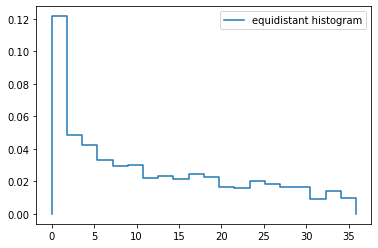

In [124]:
make_plot(i, am, "equidistant histogram")

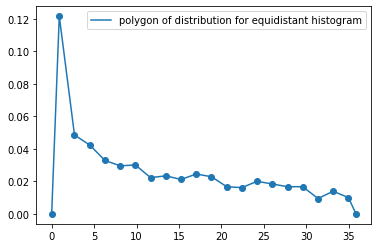

In [125]:
make_polygon(i, am, "polygon of distribution for equidistant histogram")

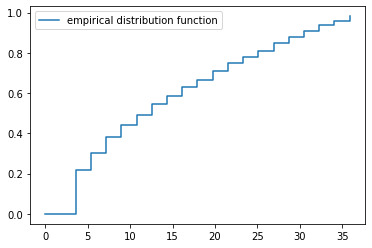

In [126]:
make_emperical_plot(i, am, "empirical distribution function")

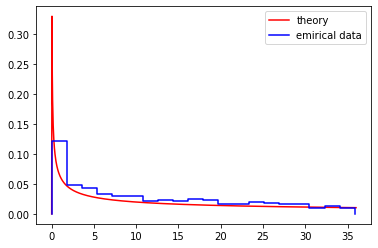

In [127]:
comp(i, am)

## Построение гистограммы равновероятностный методом

N     Interval                       Amount    
1     (0, 6e-05]                     0         
2     (6e-05, 0.0927]                0.53973   
3     (0.0927, 0.4245]               0.1507    
4     (0.4245, 0.87673]              0.11056   
5     (0.87673, 1.423]               0.09153   
6     (1.423, 2.24131]               0.0611    
7     (2.24131, 3.4186]              0.04247   
8     (3.4186, 4.61936]              0.04164   
9     (4.61936, 5.88187]             0.0396    
10    (5.88187, 7.3963]              0.03302   
11    (7.3963, 9.16366]              0.02829   
12    (9.16366, 10.9698]             0.02768   
13    (10.9698, 13.12432]            0.02321   
14    (13.12432, 15.29584]           0.02303   
15    (15.29584, 17.51045]           0.02258   
16    (17.51045, 19.64069]           0.02347   
17    (19.64069, 22.74483]           0.01611   
18    (22.74483, 25.25784]           0.0199    
19    (25.25784, 27.57108]           0.02161   
20    (27.57108, 31.71543]           0.0

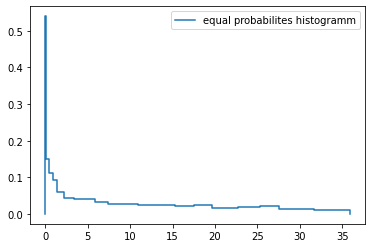

In [128]:
ei, eam = get_qprob_hist(varnts)
print_varseries(ei, eam)
make_plot(ei, eam, "equal probabilites histogramm")

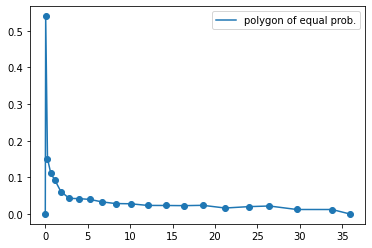

In [129]:
make_polygon(ei, eam, "polygon of equal prob.")

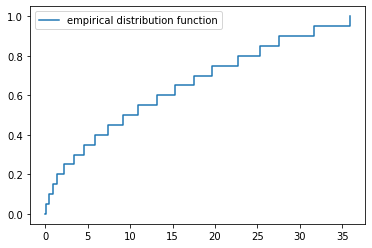

In [130]:
make_emperical_plot(ei, eam, "empirical distribution function", False)

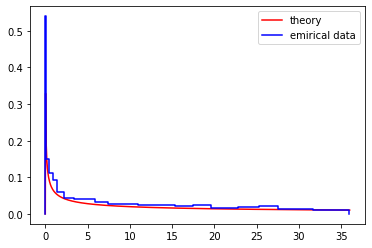

In [131]:
comp(ei, eam)